# Reference: [Python for Algorithmic Trading (Yves Hilpisch, pp.124-1138)](oreilly.com/library/view/python-for-algorithmic/9781492053347/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

# Strategies Base on Ordinary Least Squares (OLS)

This strategy uses Ordinary Least Squares (OLS) to extrpolate a trend or derive a financial instruments direction of future price movement.



## Reading the data

In [2]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()
raw

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.0000,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.6500,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5000,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.9000,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.1000,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,284.270000,157.380,59.41,1789.21,229.91,321.23,3223.38,12.67,1.1087,1498.8100,28.66,141.27
2019-12-26,289.910000,158.670,59.82,1868.77,231.21,322.94,3239.91,12.65,1.1096,1511.2979,29.08,142.38
2019-12-27,289.800000,158.960,60.08,1869.80,230.66,322.86,3240.02,13.43,1.1175,1510.4167,28.87,142.33


## Predicting Index Level


In [3]:
plt.style.use('seaborn')

tick = 'EUR='

data = raw[[tick]].rename(columns={tick: 'price'})

In [4]:
lags = 5
cols = []

for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    cols.append(col)
    data[col] = data['price'].shift(lag)
data = data.dropna()
data

,price,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-11,1.4513,1.4412,1.4318,1.4412,1.4368,1.4411
2010-01-12,1.4494,1.4513,1.4412,1.4318,1.4412,1.4368
2010-01-13,1.4510,1.4494,1.4513,1.4412,1.4318,1.4412
2010-01-14,1.4502,1.4510,1.4494,1.4513,1.4412,1.4318
2010-01-15,1.4382,1.4502,1.4510,1.4494,1.4513,1.4412
...,...,...,...,...,...,...
2019-12-24,1.1087,1.1086,1.1078,1.1120,1.1111,1.1149
2019-12-26,1.1096,1.1087,1.1086,1.1078,1.1120,1.1111
2019-12-27,1.1175,1.1096,1.1087,1.1086,1.1078,1.1120


<AxesSubplot:xlabel='Date'>

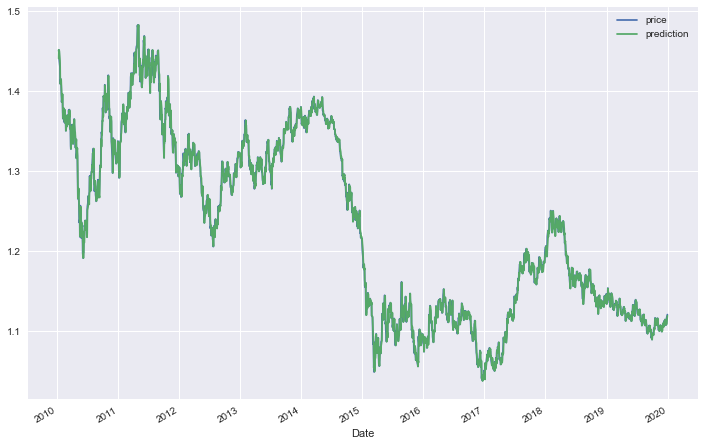

In [5]:
reg, resid, rank, s = np.linalg.lstsq(data[cols], data['price'], rcond=None)
data['prediction'] = np.dot(data[cols], reg)
data[['price', 'prediction']].plot(figsize=(12, 8))

<AxesSubplot:xlabel='Date'>

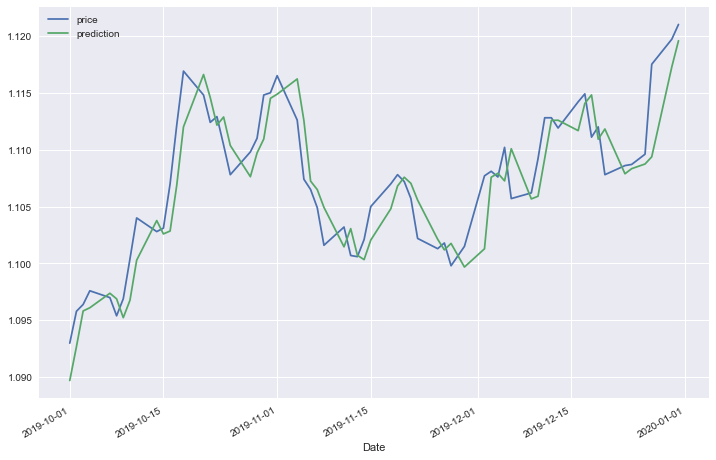

In [6]:
data.loc['2019-10-1': , ['price', 'prediction']].plot(figsize=(12, 8))

## Predicting Future Returns

In [7]:
lags = 5
cols = []

data['return'] = np.log(data['price'] / data['price'].shift())
data = data.dropna()

for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    cols.append(col)
    data[col] = data['return'].shift(lag)
data = data.dropna()
data

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2010-01-20,1.4101,-0.005858,-0.008309,-0.000551,0.001103,-0.001310,1.429671,-0.013874
2010-01-21,1.4090,-0.013874,-0.005858,-0.008309,-0.000551,0.001103,1.410560,-0.000780
2010-01-22,1.4137,-0.000780,-0.013874,-0.005858,-0.008309,-0.000551,1.408829,0.003330
2010-01-25,1.4150,0.003330,-0.000780,-0.013874,-0.005858,-0.008309,1.414101,0.000919
2010-01-26,1.4073,0.000919,0.003330,-0.000780,-0.013874,-0.005858,1.414653,-0.005457
...,...,...,...,...,...,...,...,...
2019-12-24,1.1087,0.000722,-0.003784,0.000810,-0.003414,0.000628,1.108330,0.000090
2019-12-26,1.1096,0.000090,0.000722,-0.003784,0.000810,-0.003414,1.108738,0.000811
2019-12-27,1.1175,0.000811,0.000090,0.000722,-0.003784,0.000810,1.109368,0.007094


<AxesSubplot:xlabel='Date'>

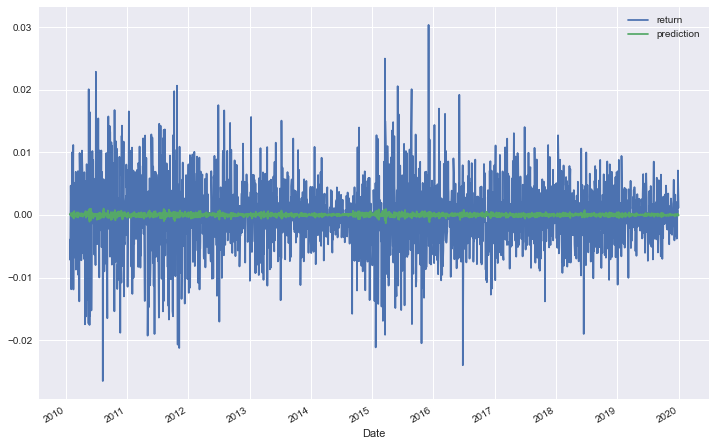

In [8]:
reg, resid, rank, s = np.linalg.lstsq(data[cols], data['return'], rcond=None)
data['prediction'] = np.dot(data[cols], reg)
data[['return', 'prediction']].iloc[lags:].plot(figsize=(12, 8))

In [9]:
print(np.sign(data['return'] * data['prediction']).value_counts())
print()
print(np.sign(data['return'] * data['prediction']).value_counts(normalize=True))


 1.0    1250
-1.0    1242
 0.0      13
dtype: int64

 1.0    0.499002
-1.0    0.495808
 0.0    0.005190
dtype: float64


## Predicting Future Market Direction


In [10]:
reg, resid, rank, s = np.linalg.lstsq(data[cols], np.sign(data['return']), rcond=None)
data['prediction'] = np.sign(np.dot(data[cols], reg))

In [11]:
print(np.sign(data['return'] * data['prediction']).value_counts())
print()
print(np.sign(data['return'] * data['prediction']).value_counts(normalize=True))


 1.0    1301
-1.0    1191
 0.0      13
dtype: int64

 1.0    0.519361
-1.0    0.475449
 0.0    0.005190
dtype: float64


## Evaluating the Strategy

In [12]:
data['strategy'] = data['return'] * data['prediction']
data[['return', 'strategy']].sum().apply(np.exp)

return      0.784026
strategy    1.654154
dtype: float64

In [13]:
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return,strategy
Date,,,,,,,,,
2010-01-20,1.4101,-0.005858,-0.008309,-0.000551,0.001103,-0.001310,1.0,-0.013874,-0.013874
2010-01-21,1.4090,-0.013874,-0.005858,-0.008309,-0.000551,0.001103,1.0,-0.000780,-0.000780
2010-01-22,1.4137,-0.000780,-0.013874,-0.005858,-0.008309,-0.000551,1.0,0.003330,0.003330
2010-01-25,1.4150,0.003330,-0.000780,-0.013874,-0.005858,-0.008309,1.0,0.000919,0.000919
2010-01-26,1.4073,0.000919,0.003330,-0.000780,-0.013874,-0.005858,1.0,-0.005457,-0.005457


<AxesSubplot:xlabel='Date'>

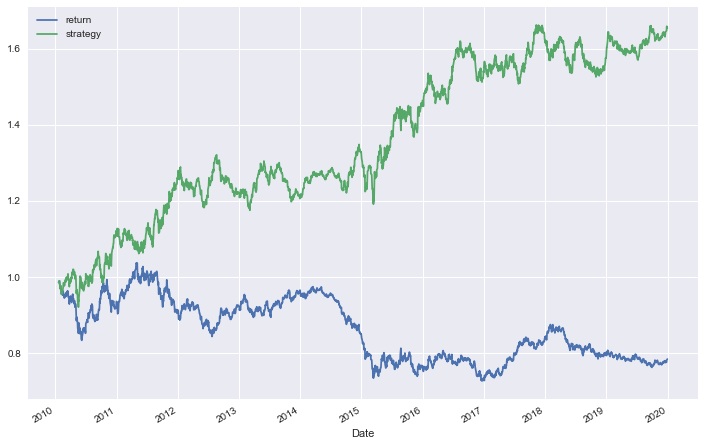

In [14]:
data['strategy'] = data['return'] * data['prediction']
data[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(12, 8))